# TASK - 4 

# HAND DIGIT RECOGNITION USING TENSORFLOW

In [2]:
## IMPORT THE NECESSARY PACKAGES AND DATASET

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
## FIX RANDOM SEED FOR REPRODUCIBILITY

seed = 7
np.random.seed(seed)

In [4]:
## LOAD THE IMAGES FROM THE MNIST DATASET

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
## CHECKING THE SIZE OF THE DATASET

print("training data: {}".format(len(y_train)))
print("testing data: {}".format(len(y_test)))

training data: 60000
testing data: 10000


In [6]:
## SHAPE OF THE DATASET

x_train[0].shape

(28, 28)

In [7]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

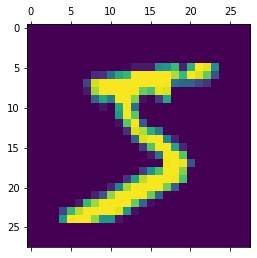

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
## NORMALIZE THE INPUTS FROM 0-255 TO 0-1

x_train = x_train / 255
x_test = x_test / 255

In [11]:
## FLATTEN THE 28*28 IMAGES TO A 784 1D VECTOR FOR EACH IMAGE

num_pixels= x_train.shape[1] * x_train.shape[2]
x_train_flat = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test_flat = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [12]:
## ONE HOT ENCODE OUTPUTS


y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print("No of classes: %d" % (num_classes))

No of classes: 10


In [13]:
## DEFINE A MULTIPLAYER PERCEPTION BASELINE MODEL -1 HIDDEN LAYER AND 1 OUTPUT LAYER 


def baseline_model():
    
    
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',activation= 'softmax'))
    model.add(Dense(num_classes, kernel_initializer= 'normal',activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model
    

In [14]:
## BUILD THE MODEL

model = baseline_model()

In [17]:
## TRAIN AND VALIDATE THE MODEL 
## VERBOSE  VERBOSITY MODE (0 = SILENT, 1= PROGRESS BAR, 2 = ONE LINE PER EPOCH)

model.fit(x_train_flat,y_train,validation_data=(x_test_flat,y_test),verbose= 1, epochs= 10,batch_size= 200)

Epoch 1/10
300/300 [==============================] - 5s 15ms/step - loss: 0.2992 - accuracy: 0.9433 - val_loss: 0.3044 - val_accuracy: 0.9369
Epoch 2/10
300/300 [==============================] - 4s 15ms/step - loss: 0.2814 - accuracy: 0.9444 - val_loss: 0.2898 - val_accuracy: 0.9387
Epoch 3/10
300/300 [==============================] - 5s 15ms/step - loss: 0.2671 - accuracy: 0.9456 - val_loss: 0.2824 - val_accuracy: 0.9380
Epoch 4/10
300/300 [==============================] - 4s 15ms/step - loss: 0.2549 - accuracy: 0.9468 - val_loss: 0.2706 - val_accuracy: 0.9395
Epoch 5/10
300/300 [==============================] - 5s 15ms/step - loss: 0.2430 - accuracy: 0.9490 - val_loss: 0.2604 - val_accuracy: 0.9411
Epoch 6/10
300/300 [==============================] - 4s 15ms/step - loss: 0.2333 - accuracy: 0.9496 - val_loss: 0.2591 - val_accuracy: 0.9393
Epoch 7/10
300/300 [==============================] - 4s 15ms/step - loss: 0.2247 - accuracy: 0.9508 - val_loss: 0.2492 - val_accuracy: 0.9408

In [18]:
## FINAL EVALUATION OF THE MODEL

scores= model.evaluate(x_test_flat,y_test, verbose=0)
print("accuracy: %.2f%%" %(scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

accuracy: 94.13%
Baseline Error: 5.87%


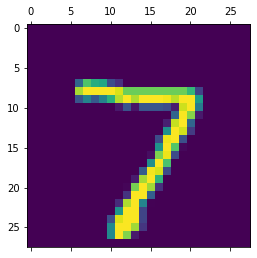

In [19]:
plt.matshow(x_test[0])

In [20]:
y_predict=model.predict(x_test_flat)
y_predict[0]


array([0.00139136, 0.00210674, 0.0040239 , 0.003292  , 0.00156543,
       0.00169016, 0.00134586, 0.97599834, 0.00192269, 0.00666357],
      dtype=float32)

In [21]:
## TESTING A VALUE

np.argmax(y_predict[0])

7

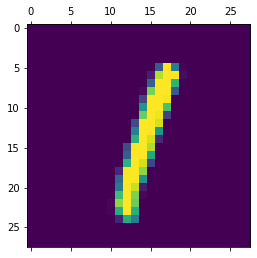

In [22]:
plt.matshow(x_test[5])

In [23]:
y_predict[5]

array([0.00126311, 0.983489  , 0.00165266, 0.00161151, 0.0018639 ,
       0.00160096, 0.00160325, 0.00218146, 0.00292446, 0.00180975],
      dtype=float32)

In [24]:
np.argmax(y_predict[5])

1